In [39]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import os
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold

In [40]:
# Binding
import pandas as pd
from sklearn.model_selection import KFold
import os

nek_5 = ["5"]

for nek in nek_5:
    # Get training data
    data_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek 
    file_name = "NEK" + nek + "_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv"
    file_path = os.path.join(data_path, file_name)

    # Check if the file exists before attempting to read
    if os.path.isfile(file_path):
        binding_df = pd.read_csv(file_path)
        print(binding_df.shape)

        # Continue with the rest of your processing here
        print(binding_df.active.value_counts())
        num_gap = (binding_df.loc[binding_df['active']==0].shape[0]) - (binding_df.loc[binding_df['active']==1].shape[0])
        print(num_gap)
        num_minority = binding_df.loc[binding_df['active']==1].shape[0]
        print(num_minority)

    # Separate majority and minority classes
        df_majority = binding_df[binding_df['active']==0]
        df_minority = binding_df[binding_df['active']==1]

        #=======================
        # Create 5-fold splits
        #=======================
        kf = KFold(n_splits=5, shuffle=True, random_state=0)

        # majority
        for i, (_, v_ind) in enumerate(kf.split(df_majority)):
            df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"

        # minority
        for i, (_, v_ind) in enumerate(kf.split(df_minority)):
            df_minority.loc[df_minority.index[v_ind], 'fold'] = f"fold{i+1}"


        print(df_majority['fold'].value_counts())
        print(df_minority['fold'].value_counts())


        # Concat
        all_fold_df = pd.concat([df_majority,df_minority])
        print(all_fold_df.shape)
        print(all_fold_df.active.value_counts())


        # Save to file
        split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
            
            # Ensure this directory exists
        os.makedirs(split_path, exist_ok=True)

        all_fold_df.to_csv(os.path.join(split_path, file_name), index=False)
    else:
        print(f"File not found: {file_path}")

(1237, 310)
active
0    1140
1      97
Name: count, dtype: int64
1043
97
fold
fold3    228
fold1    228
fold2    228
fold4    228
fold5    228
Name: count, dtype: int64
fold
fold1    20
fold2    20
fold3    19
fold5    19
fold4    19
Name: count, dtype: int64
(1237, 310)
active
0    1140
1      97
Name: count, dtype: int64


In [41]:
# Separate majority and minority classes
df_majority = binding_df[binding_df['active']==0]
df_minority = binding_df[binding_df['active']==1]

print("Shape of the majority: ",df_majority.shape)
df_minority

Shape of the majority:  (1140, 310)


,compound_id,base_rdkit_smiles,active,ASA+_per_atom,ASA-,ASA_H_per_atom,ASA_P,ASA_per_atom,BCUT_PEOE_0,BCUT_PEOE_1,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol_per_atom,zagreb_per_atom,fold
1140,kdb_2255,Cc1cnc(Nc2ccc(C(=O)N3CCC([NH+]4CCCC4)CC3)cc2)n...,1,7.129596,221.71678,9.593643,59.627785,10.470523,-2.799085,-0.627536,...,140.500,32.625,14.375,4.875,0.250,0.00,4863,0.838235,2.911765,fold3
1141,kdb_2207,COc1cc2ncn(-c3cc(O[C@H](C)c4ccccc4Cl)c(C(N)=O)...,1,7.972049,237.02055,9.733202,147.201740,12.619510,-2.441789,-0.603292,...,150.250,27.125,10.625,3.125,0.375,0.00,2744,1.019608,3.254902,fold3
1142,kdb_2176,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,1,7.610593,294.18137,10.628470,113.108750,12.513616,-2.578289,-0.647668,...,182.625,36.375,15.375,5.625,0.875,0.00,4403,0.750000,2.866667,fold1
1143,kdb_2069,Nc1ncnc2c1c(I)cn2C1OC(CO)C(O)C1O,1,8.871621,191.12732,7.302865,249.117520,14.851882,-2.511235,-0.645868,...,152.125,37.000,11.125,2.750,0.250,0.00,742,1.060606,3.333333,fold2
1144,kdb_2113,CC(C)(C)OC(=O)NCc1cccc(Nc2ncc(Br)c(NCCCNC(=O)C...,1,6.026658,223.75838,8.361651,175.818510,10.985808,-2.771648,-0.578855,...,155.875,47.875,19.125,6.625,0.500,0.00,4500,0.656716,2.537313,fold3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,kdb_2114,CCCC(=O)Nc1cccc(Nc2ncc(Br)c(NCCCNC(=O)C3CCC3)n...,1,5.159087,223.60912,8.378988,176.980530,11.328663,-2.771648,-0.604474,...,192.875,65.250,32.625,14.250,6.750,2.75,3426,0.683333,2.533333,fold2
1233,kdb_2254,O=C(NCCCN1CCOCC1)c1ccc(Nc2nccc(-c3cc4ccccc4s3)...,1,7.156522,198.34747,8.484256,119.006930,10.403723,-2.767015,-0.615718,...,159.750,32.500,11.500,3.750,0.000,0.00,4459,0.790323,2.870968,fold5
1234,kdb_2767,C[C@@H](Oc1cc(-n2cnc3ccc(-c4ccncc4)cc32)sc1C(N...,1,7.637708,289.85028,10.010394,170.801560,13.295039,-2.441789,-0.622655,...,149.750,25.750,9.625,2.500,0.250,0.00,3294,1.038462,3.461538,fold4
1235,kdb_2256,O=C(c1ccc(Nc2ncc(C3CC3)c(-c3cc4ccccc4s3)n2)cc1...,1,7.167467,212.28886,8.345709,128.757130,10.134003,-2.799085,-0.653614,...,165.625,36.250,14.750,4.250,0.000,0.00,5514,0.847222,2.972222,fold4


In [42]:
# Create 5-fold splits
# Use random_state=0
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# majority
for i, (_, v_ind) in enumerate(kf.split(df_majority)):
    df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"
    
df_majority['fold'].value_counts()

fold
fold3    228
fold1    228
fold2    228
fold4    228
fold5    228
Name: count, dtype: int64

In [43]:
# Binding
method = "binding"
nek_5 = ["5"]
foldAll = ["fold1","fold2","fold3","fold4","fold5"]

for nek in nek_5:
    # Get training data
    split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
    random_df = pd.read_csv(split_path+"/NEK"+nek+"_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv")
    random_df.head

    moe_columns = random_df.columns[3:]
    moe_columns = moe_columns[:-1]
    moe_columns

    # Use the fold 0 as the test set, fold 1,2,3,4 as the train set
    for fold in foldAll:
        test_moe_df = random_df.loc[random_df['fold'] == fold]
        train_moe_df = random_df.loc[random_df['fold'] != fold]
        print(test_moe_df.shape)
        print(train_moe_df.shape)

        test_x_df = test_moe_df[moe_columns]
        test_y_df = test_moe_df['active']
        print(test_x_df)
        print(test_y_df.value_counts())

        train_x_df = train_moe_df[moe_columns]
        train_y_df = train_moe_df['active']
        print(train_x_df.shape)
        print(train_y_df.value_counts())


        # Save to file
        uq_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
        #uq_path = "/p/lustre2/fan4/myGPyTorch/classification_NEK/data/"

        train_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainX.csv", index=False)
        train_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainY.csv", index=False)
        test_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testX.csv", index=False)
        test_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testY.csv", index=False)





(248, 310)
(989, 310)
      ASA+_per_atom       ASA-  ASA_H_per_atom      ASA_P  ASA_per_atom  \
1          5.994013  175.26022        9.389342  160.19148     12.411823   
14         8.143989  172.74998        8.340377  158.41364     10.510427   
15         7.558447  275.62744       10.419536  185.81779     15.728617   
18         7.640180  209.40883        9.224951  131.75505     11.913830   
27        10.034180  194.92766       11.159462  154.57048     14.929475   
...             ...        ...             ...        ...           ...   
1211       9.364868  148.06656        9.751122  122.57384     11.608300   
1218       9.508312  134.60069        8.863824  177.13689     11.547717   
1221       8.014165  278.35916        9.845626  181.29170     13.266225   
1224       9.103675  200.99684        9.508262  174.29413     12.149082   
1229       8.277690  283.83401        9.268148  237.64000     14.020948   

      BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
1       -2.771648

In [44]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# check version number
import imblearn
print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE


# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
imblearn version:  0.12.0


In [45]:
# confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# from sklearn 0.19.2 documentation:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
# PCA

x_df = pd.concat([train_x_df, test_x_df])

# PCA
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(x_df)
Scaled_data=scaling.transform(x_df)
train_scaled_data = scaling.transform(train_x_df)
test_scaled_data = scaling.transform(test_x_df)

# Set the n_components=3
# 95% variance
principal=PCA(n_components=0.95)
principal.fit(Scaled_data)
pca_train_x_df=principal.transform(train_scaled_data)
pca_test_x_df=principal.transform(test_scaled_data)

print(pca_train_x_df.shape)
print(pca_test_x_df.shape)



(990, 65)
(247, 65)


In [47]:
# SMOTE

# SMOTE: Adjust imbalanced training data

# transform the dataset
oversample = SMOTE()
new_train_x_df, new_train_y_df = oversample.fit_resample(pca_train_x_df, train_y_df)



In [48]:
# Transform data to PyTorch tensors

# PCA then SMOTE
train_x_temp = new_train_x_df.astype("long")
train_y_temp = new_train_y_df.to_numpy().astype("long")

# PCA
test_x_temp = pca_test_x_df.astype("long")


test_y_temp = test_y_df.to_numpy().astype("long")

train_x = torch.from_numpy(train_x_temp)
train_y = torch.from_numpy(train_y_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y_temp)


print(train_x.shape)
print(train_y.shape)

torch.Size([1824, 65])
torch.Size([1824])


In [49]:
# Construct a GP classification model

from gpytorch.models import ExactGP
from gpytorch.likelihoods import DirichletClassificationLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel

# We will use the simplest form of GP model, exact inference
class DirichletGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood, num_classes):
        super(DirichletGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean(batch_shape=torch.Size((num_classes,)))
        self.covar_module = ScaleKernel(
            RBFKernel(batch_shape=torch.Size((num_classes,))),
            batch_shape=torch.Size((num_classes,)),
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
# we let the DirichletClassificationLikelihood compute the targets for us
likelihood = DirichletClassificationLikelihood(train_y, learn_additional_noise=True)
model = DirichletGPModel(train_x, likelihood.transformed_targets, likelihood, num_classes=likelihood.num_classes)


In [50]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 300


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, likelihood.transformed_targets).sum()
    loss.backward()
    if i % 5 == 0:
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            model.covar_module.base_kernel.lengthscale.mean().item(),
            model.likelihood.second_noise_covar.noise.mean().item()
        ))
    optimizer.step()

Iter 1/300 - Loss: 7.035   lengthscale: 0.693   noise: 0.693
Iter 6/300 - Loss: 6.285   lengthscale: 0.973   noise: 0.972
Iter 11/300 - Loss: 5.743   lengthscale: 1.313   noise: 1.286
Iter 16/300 - Loss: 5.316   lengthscale: 1.716   noise: 1.583
Iter 21/300 - Loss: 5.014   lengthscale: 2.184   noise: 1.795
Iter 26/300 - Loss: 4.784   lengthscale: 2.698   noise: 1.879
Iter 31/300 - Loss: 4.594   lengthscale: 3.231   noise: 1.825
Iter 36/300 - Loss: 4.429   lengthscale: 3.762   noise: 1.653
Iter 41/300 - Loss: 4.271   lengthscale: 4.279   noise: 1.395
Iter 46/300 - Loss: 4.123   lengthscale: 4.762   noise: 1.094
Iter 51/300 - Loss: 4.009   lengthscale: 5.194   noise: 0.799
Iter 56/300 - Loss: 3.915   lengthscale: 5.565   noise: 0.548
Iter 61/300 - Loss: 3.836   lengthscale: 5.872   noise: 0.361
Iter 66/300 - Loss: 3.786   lengthscale: 6.122   noise: 0.236
Iter 71/300 - Loss: 3.743   lengthscale: 6.322   noise: 0.160
Iter 76/300 - Loss: 3.719   lengthscale: 6.479   noise: 0.114
Iter 81/30

In [51]:
# Make predictions with the model

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(train_x)
    pred_means = test_dist.loc
    observed_pred = likelihood(model(train_x))

print(pred_means.numpy().shape)
print(pred_means.max(0)[1])

(2, 1824)
tensor([0, 0, 0,  ..., 1, 1, 1])


/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Confusion matrix, without normalization
[[911   1]
 [  0 912]]


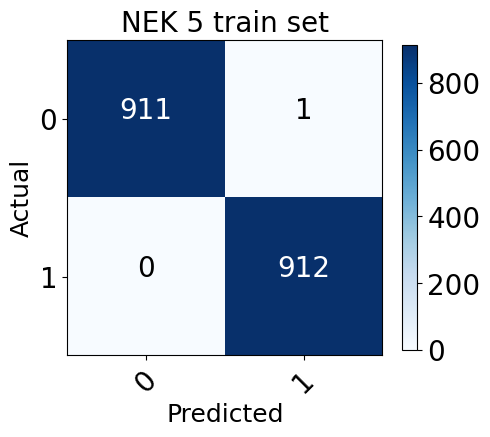

In [52]:
train_prediction = model(train_x).loc.max(0)[1].numpy()
y_true = new_train_y_df.values
y_pred = train_prediction
train_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK 5 train set",fontsize=20)
plot_confusion_matrix(train_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);

In [53]:
# Make predictions with the model
# Prediction on the test set

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(test_x)
    test_pred_means = test_dist.loc
    test_pred = likelihood(model(test_x))
    
print(test_pred_means.numpy().shape)
print(test_pred_means.max(0)[1])

(2, 247)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1])


In [54]:
test_prediction = model(test_x).loc.max(0)[1].numpy()
print(test_prediction.shape)
test_prediction

(247,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1])

Confusion matrix, without normalization
[[219   9]
 [ 13   6]]


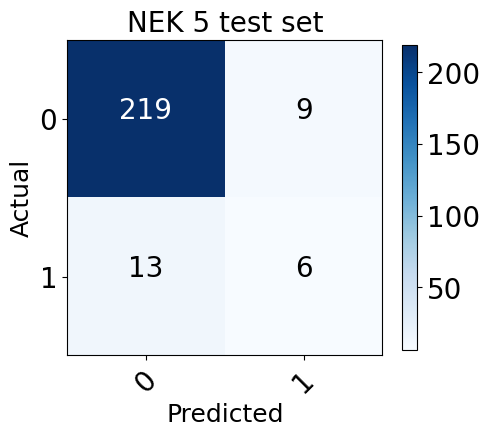

In [55]:
y_true = test_y_df.values
y_pred = test_prediction
test_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK 5 test set",fontsize=20)
plot_confusion_matrix(test_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);


In [56]:
lower, upper = observed_pred.confidence_region()
upper

tensor([[ 3.2675,  1.3277,  3.2870,  ..., -1.6652, -2.4340, -0.0477],
        [-0.5398,  2.2140, -0.9166,  ...,  2.2193,  1.7988,  1.6815]])

In [57]:
observed_pred.mean.numpy()


array([[-0.37032387, -1.6713092 , -0.34292516, ..., -6.3820734 ,
        -6.9898424 , -4.6762886 ],
       [-6.4033084 , -2.831406  , -6.7381153 , ..., -0.3790064 ,
        -0.44927216, -0.61550045]], dtype=float32)

In [58]:
print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

(2, 1824)


array([[3.3084407, 2.248574 , 3.2941313, ..., 5.562296 , 5.1890106,
        5.3558474],
       [8.595229 , 6.3640585, 8.472601 , ..., 1.687767 , 1.2634549,
        1.319092 ]], dtype=float32)

In [59]:
print(pred_means.numpy())

[[-0.37032387 -1.6713092  -0.34292516 ... -6.3820734  -6.9898424
  -4.6762886 ]
 [-6.4033084  -2.831406   -6.7381153  ... -0.3790064  -0.44927216
  -0.61550045]]


In [60]:
# Draw samples from the posterior.
pred_samples = test_dist.sample(torch.Size((256,))).exp()
probabilities = (pred_samples / pred_samples.sum(-2, keepdim=True)).mean(0)
probabilities

tensor([[0.9910, 0.9609, 0.9859, 0.9924, 0.7634, 0.8507, 0.9925, 0.9561, 0.9830,
         0.9456, 0.9359, 0.9786, 0.9784, 0.8294, 0.9953, 0.8103, 0.8586, 0.9239,
         0.9949, 0.8584, 0.9923, 0.9555, 0.9657, 0.9862, 0.9264, 0.9670, 0.9809,
         0.9278, 0.5095, 0.9673, 0.9657, 0.4855, 0.9777, 0.9863, 0.9889, 0.9732,
         0.9923, 0.9894, 0.9229, 0.4000, 0.9287, 0.9745, 0.9848, 0.8376, 0.9692,
         0.6412, 0.9762, 0.6031, 0.9326, 0.9958, 0.7848, 0.8700, 0.9849, 0.9343,
         0.8538, 0.6036, 0.9781, 0.9870, 0.9854, 0.5419, 0.9753, 0.9758, 0.9713,
         0.8375, 0.9905, 0.9945, 0.3911, 0.9771, 0.9255, 0.9894, 0.9437, 0.9807,
         0.9086, 0.9684, 0.9779, 0.9969, 0.9847, 0.9520, 0.9800, 0.8954, 0.5606,
         0.9626, 0.9384, 0.9809, 0.9462, 0.9885, 0.4413, 0.9679, 0.9185, 0.9526,
         0.9352, 0.8127, 0.1364, 0.9917, 0.9947, 0.9716, 0.9225, 0.9617, 0.9967,
         0.9613, 0.8763, 0.9884, 0.9557, 0.9340, 0.9639, 0.9901, 0.9970, 0.9740,
         0.9949, 0.9750, 0.9

In [61]:
test_pred.mean.numpy()

array([[-0.36492866, -0.39983094, -0.4650877 , -0.32833183, -1.8002369 ,
        -1.306548  , -0.23062043, -0.6382904 , -0.29968783, -0.72869635,
        -0.7101054 , -0.49454385, -0.35650882, -1.7816234 , -0.19377357,
        -1.4593294 , -1.3796122 , -1.2031753 ,  0.20665765, -1.5970645 ,
        -0.0538317 , -0.66681504, -0.52215475, -0.43703216, -0.8745522 ,
        -0.4818082 , -0.3718034 , -1.1412399 , -2.8389626 , -0.3656456 ,
        -0.4264099 , -2.7706463 , -0.49881065, -0.37735462, -0.41842237,
        -0.36823818, -0.22377253, -0.04082936, -0.9525084 , -3.1751304 ,
        -1.1161358 , -0.708576  , -0.24051106, -1.1644101 , -0.42381194,
        -2.3843508 , -0.45752496, -2.4387698 , -1.2161875 , -0.30852616,
        -1.458149  , -1.3629931 , -0.11698779, -1.1073194 , -1.3692842 ,
        -2.3460405 , -0.4192222 , -0.4317602 ,  0.07442492, -2.718379  ,
        -0.47434354, -0.46912724, -0.61865777, -1.6281195 , -0.35829443,
        -0.02094224, -3.127972  , -0.34438223, -1.0

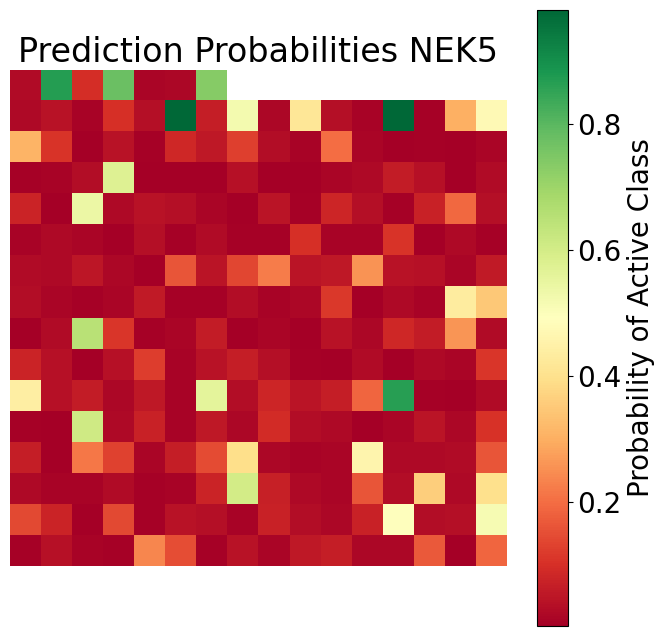

In [62]:
import matplotlib.pyplot as plt
import numpy as np

probabilities_np = probabilities.numpy()

active_probabilities = probabilities_np[1, :]


num_samples = active_probabilities.shape[0]
side_length = int(np.ceil(np.sqrt(num_samples)))  # Calculate the side length of the grid

# Create a 2D array filled with NaNs (to be ignored in the plot)
grid_data = np.full((side_length, side_length), np.nan)

# Fill the grid with the active probabilities
# Flatten the grid (if needed) and assign probabilities (ensures alignment even if not a perfect square)
grid_data.flat[:num_samples] = active_probabilities

# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(grid_data, cmap='RdYlGn', origin='lower', aspect='equal')
plt.colorbar(label='Probability of Active Class')
plt.title('Prediction Probabilities NEK5')
plt.axis('off')  # Turn off the axis for a clean look

plt.show()

NameError: name 'cm' is not defined

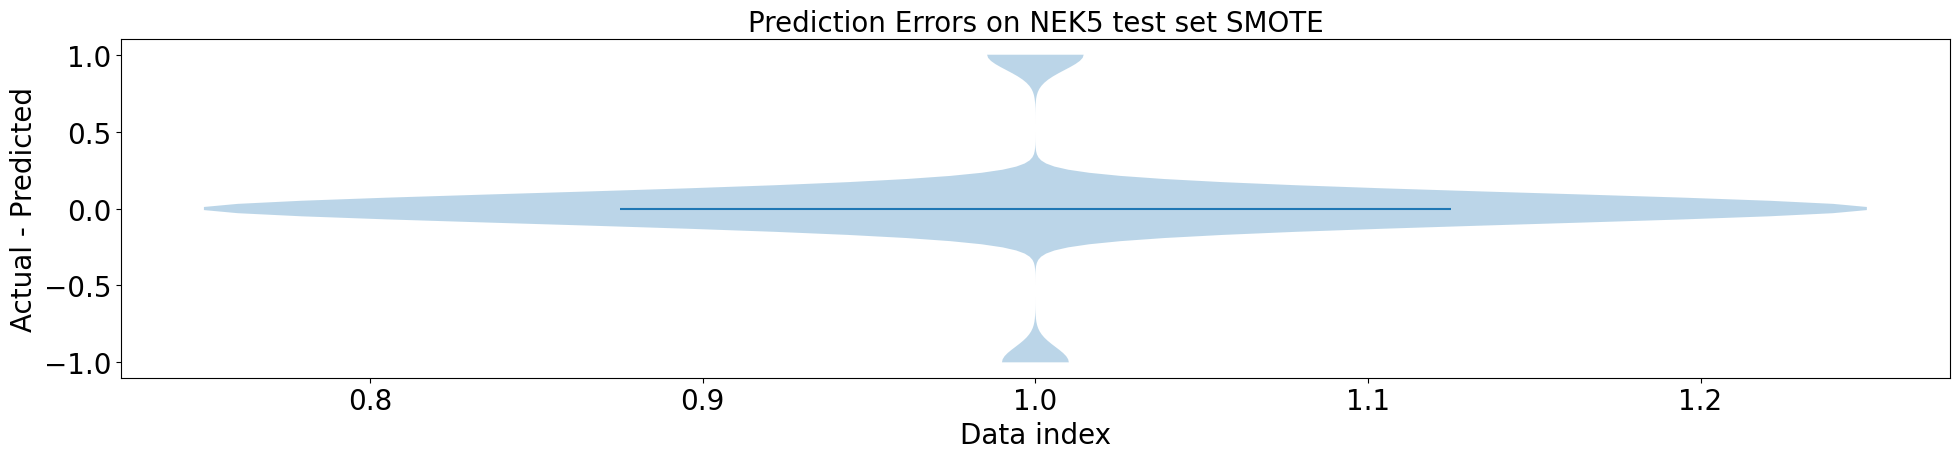

In [63]:
fig = plt.figure(figsize=(20, 5))

plt.title("Prediction Errors on NEK5 test set SMOTE", fontsize=20)


# Plot the violin plot with modified widths
plt.violinplot((y_true - test_prediction), showmeans=False, showextrema=False, showmedians=True)

plt.xlabel('Data index')
plt.ylabel('Actual - Predicted')
fig.tight_layout()

# Add colorbar to show the mapping of variance
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(vmin=var_min, vmax=var_max))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Test Prediction Variance')

plt.show()


In [65]:
print(test_pred.variance.numpy().shape)
test_pred.variance.numpy()
test_pred_variance2D = test_pred.variance.numpy()
test_pred_variance2D

(2, 247)


array([[2.0532649, 2.6275885, 1.8981884, 2.3084252, 1.6224995, 2.5116067,
        2.5163424, 2.5605643, 2.5864644, 2.0785108, 2.4504645, 2.561679 ,
        2.6093812, 2.2368262, 1.8735008, 2.0984347, 2.482614 , 2.3698661,
        2.3407264, 2.0323527, 2.428403 , 2.4936004, 2.5799732, 1.5147083,
        2.428078 , 2.4358642, 2.5662   , 2.3002665, 2.4596608, 2.628324 ,
        2.6246355, 2.259549 , 2.587314 , 1.8570565, 2.324147 , 2.6273656,
        2.604235 , 2.2145748, 2.5167873, 1.3285114, 1.8128054, 1.7201159,
        2.3726099, 2.343124 , 2.628077 , 2.0928924, 2.5564888, 2.1329935,
        1.9354401, 1.9940248, 2.101196 , 2.254218 , 2.542091 , 2.2429805,
        1.8917785, 1.886152 , 2.531162 , 2.299076 , 2.250067 , 1.909185 ,
        2.1143775, 2.3831398, 2.434134 , 1.4802651, 2.4869332, 2.1724522,
        1.7837896, 2.6144753, 2.5774014, 2.3490038, 2.5077157, 2.109494 ,
        1.9996629, 2.4527767, 2.6266313, 1.8057699, 2.1946647, 2.370096 ,
        2.5502822, 2.3401535, 2.012886

In [66]:
# Using test prediction as index to extract prediction variance
test_pred_variance = [test_pred_variance2D[value][idx] for idx,value in enumerate(test_prediction)]
test_pred_variance

[2.0532649,
 2.6275885,
 1.8981884,
 2.3084252,
 1.6224995,
 2.5116067,
 2.5163424,
 2.5605643,
 2.5864644,
 2.0785108,
 2.4504645,
 2.561679,
 2.6093812,
 2.2368262,
 1.8735008,
 2.0984347,
 2.482614,
 2.3698661,
 2.3407264,
 2.0323527,
 2.428403,
 2.4936004,
 2.5799732,
 1.5147083,
 2.428078,
 2.4358642,
 2.5662,
 2.3002665,
 3.180245,
 2.628324,
 2.6246355,
 2.6548057,
 2.587314,
 1.8570565,
 2.324147,
 2.6273656,
 2.604235,
 2.2145748,
 2.5167873,
 1.29417,
 1.8128054,
 1.7201159,
 2.3726099,
 2.343124,
 2.628077,
 2.0928924,
 2.5564888,
 2.1329935,
 1.9354401,
 1.9940248,
 2.101196,
 2.254218,
 2.542091,
 2.2429805,
 1.8917785,
 1.886152,
 2.531162,
 2.299076,
 2.250067,
 1.909185,
 2.1143775,
 2.3831398,
 2.434134,
 1.4802651,
 2.4869332,
 2.1724522,
 1.8978018,
 2.6144753,
 2.5774014,
 2.3490038,
 2.5077157,
 2.109494,
 1.9996629,
 2.4527767,
 2.6266313,
 1.8057699,
 2.1946647,
 2.370096,
 2.5502822,
 2.3401535,
 2.0128868,
 1.8854094,
 2.3390381,
 2.5669353,
 2.1270688,
 1.7306

In [67]:
categories = []

for true, pred in zip(y_true, test_prediction):
    if true == 1 and pred == 1:
        categories.append('6') #TP
    elif true == 1 and pred == 0: 
        categories.append('7') # FN
    elif true == 0 and pred == 1: 
        categories.append('8') # FP
    elif true == 0 and pred == 0:
        categories.append('9') #TN

categories = np.array(categories)  # Convert the list to a numpy array



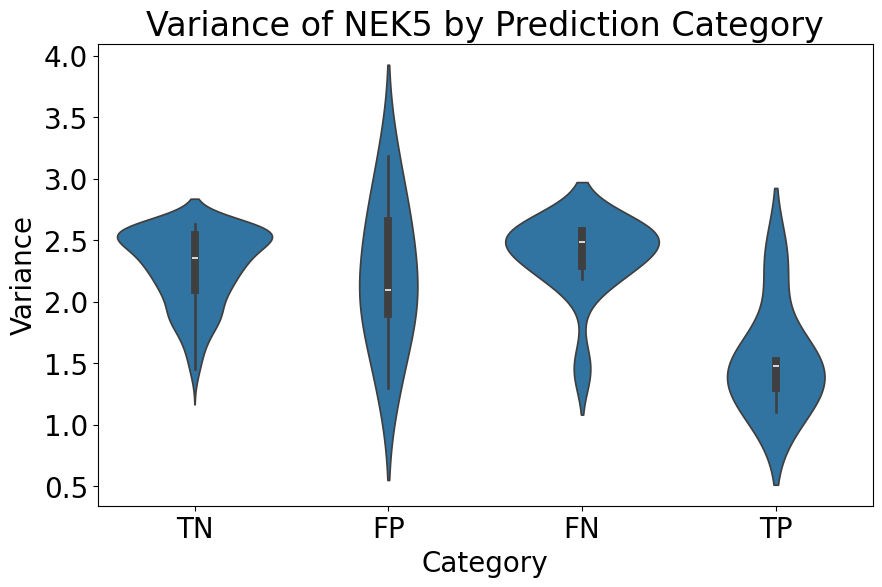

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the categories and variances
data = pd.DataFrame({
    'Category': categories,
    'Variance': test_pred_variance
})

# Replace numeric categories with labels for clarity
category_labels = {'6': 'TP', '7': 'FN', '8': 'FP', '9': 'TN'}
data['Category'] = data['Category'].replace(category_labels)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
sns.violinplot(x='Category', y='Variance', data=data)

# Setting plot title and labels
plt.title('Variance of NEK5 by Prediction Category')
plt.xlabel('Category')
plt.ylabel('Variance')

plt.show()